In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Gabor function

In [102]:
%%latex

Gabor filter's impulse response is the convolution of the Fourier transform of the harmonic function (sinusoidal function) and the Fourier transform of the Gaussian function:

$g(x, y, \sigma, \theta , \lambda, \psi, \gamma ) = exp(- \frac{ x'^{2} + \gamma^2 y'^{2}}{2\sigma^{2}})  exp(i(2\pi \frac{x'}{\lambda} + \psi)) $

$ where: \\ x' = x \cos(\theta) + y \sin(\theta) \\  y' = - x \sin(\theta) + y \cos(\theta)$

<IPython.core.display.Latex object>

In [103]:
def gabor(x, y, sigma, theta, Lambda, psi, gamma):
    """Gabor feature extraction."""
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    (y, x) = np.meshgrid(y, x)

    # Rotation
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)

    gb = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    return gb

In [104]:
x = np.linspace(-30, 30, 3000)
y = np.linspace(-30, 30, 3000)
sigma = 20
theta = 2*np.pi
Lambda =  np.pi
psi = 0
gamma = 1

Z = gabor(x, y, sigma=sigma, theta=theta, Lambda=Lambda, psi=psi, gamma=gamma)

### 3D

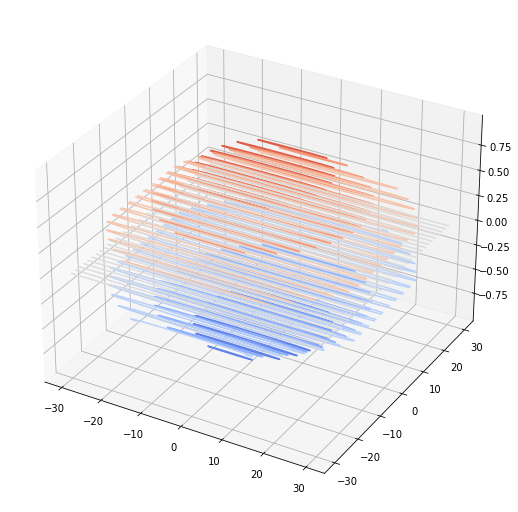

In [105]:
fig = plt.figure(figsize=(10,7), constrained_layout=True)
ax = plt.axes(projection='3d')

ax.contour3D(x, y, Z, cmap='coolwarm')


### 2D

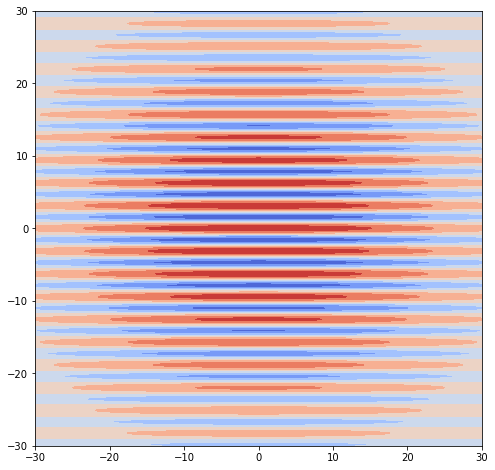

In [106]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.contourf(x, y, Z, cmap='coolwarm')

## Gabor kernel

Text(0.5, 1.0, 'kernel')

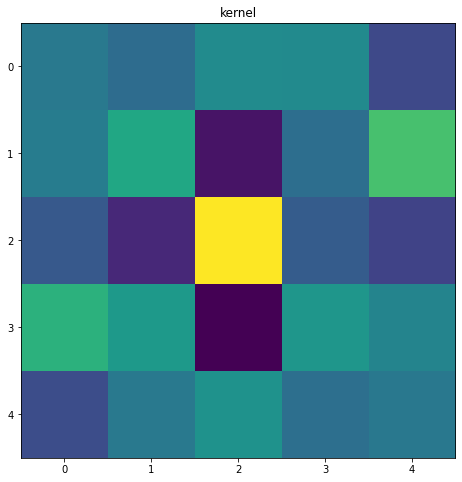

In [108]:

ksize = 5
sigma = 1
theta = 1*np.pi/3
lamb = 1*np.pi/2
gamma = 0.5
phi = 0.2

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamb, gamma, phi, ktype=cv2.CV_32F)

plt.figure(figsize=(8,8))
plt.imshow(kernel)
plt.title("kernel")

### Varing Kernel size

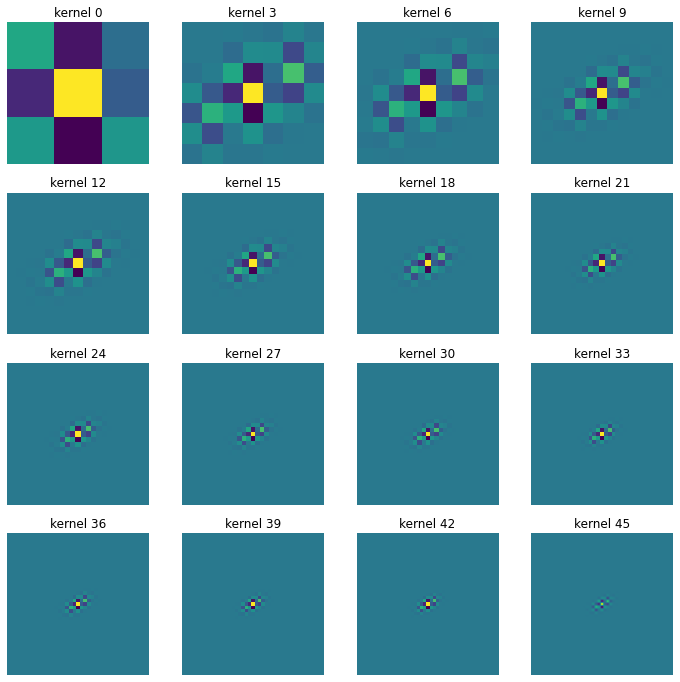

In [111]:

def show_stack(stack, cols, rows, start_with=0, show_every=1):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('kernel %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind])
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

kernels = []
for k in range(3, 51):
    kernel = cv2.getGaborKernel((k, k), sigma, theta, lamb, gamma, phi, ktype=cv2.CV_32F)

    kernels.append(kernel)

show_stack(kernels, 4, 4, 0, 3)

### Varing parameters

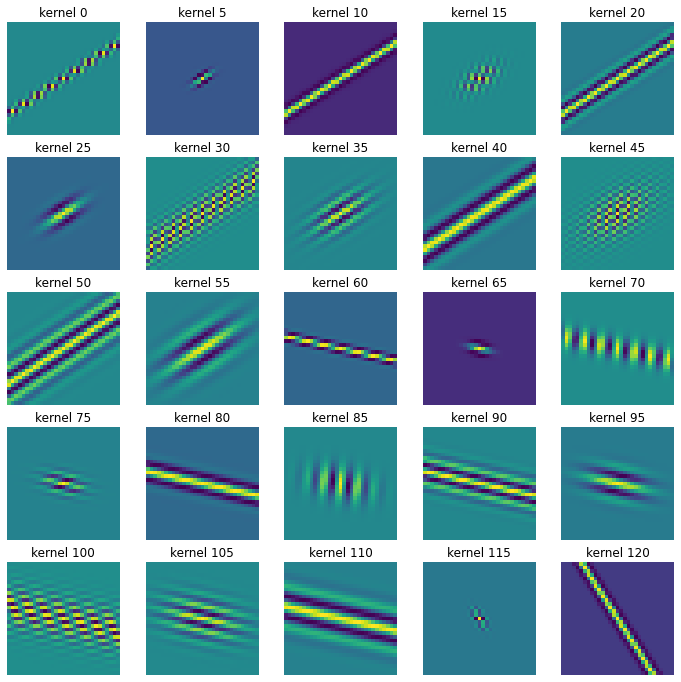

In [136]:
def gabor_bank(ksize=5):

    kernels = []    
    for theta in np.arange(1, 2 * np.pi, np.pi/4):
        for sigma in np.arange(1, 5, 1):
            for lamb in np.arange(1, 2 * np.pi, np.pi/4):
                for gamma in np.arange(0,1, 0.5):
                    psi= 0
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamb, gamma, psi, ktype=cv2.CV_32F)

                    kernels.append(kernel)

    return kernels

kernels = gabor_bank(ksize=30)

show_stack(kernels, 5, 5, 0, 5)

### Features extraction

Text(0.5, 1.0, 'filtered')

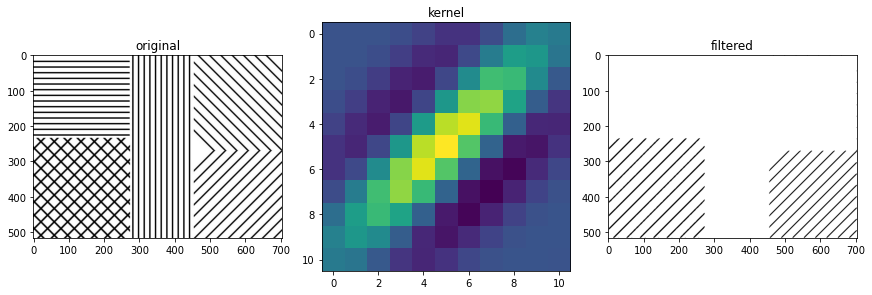

In [165]:
def gabor_kernel(ksize=5, theta=0, sigma=3, lamb=0, gamma=1, psi=0):

    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamb, gamma, phi, ktype=cv2.CV_32F)

    return kernel

kernel = gabor_kernel(ksize=10, theta=1*np.pi/4, sigma=2, lamb=1*np.pi/4, gamma=0.5, psi=0)

img = cv2.imread("example.JPG")


fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

fig, ax = plt.subplots(1, 3, figsize=(12,10), constrained_layout=True)

ax[0].imshow(img)
ax[0].set_title("original")

ax[1].imshow(kernel)
ax[1].set_title("kernel")

ax[2].imshow(fimg)
ax[2].set_title("filtered")

Text(0.5, 1.0, 'filtered')

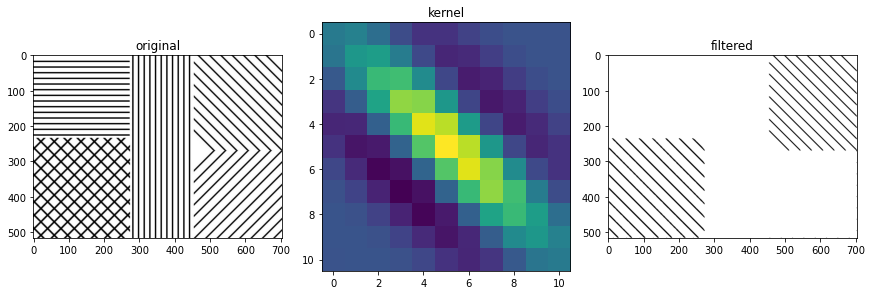

In [166]:
kernel = gabor_kernel(ksize=10, theta=3*np.pi/4, sigma=2, lamb=1*np.pi/4, gamma=0.5, psi=0)


fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

fig, ax = plt.subplots(1, 3, figsize=(12,10), constrained_layout=True)

ax[0].imshow(img)
ax[0].set_title("original")

ax[1].imshow(kernel)
ax[1].set_title("kernel")

ax[2].imshow(fimg)
ax[2].set_title("filtered")

Text(0.5, 1.0, 'filtered')

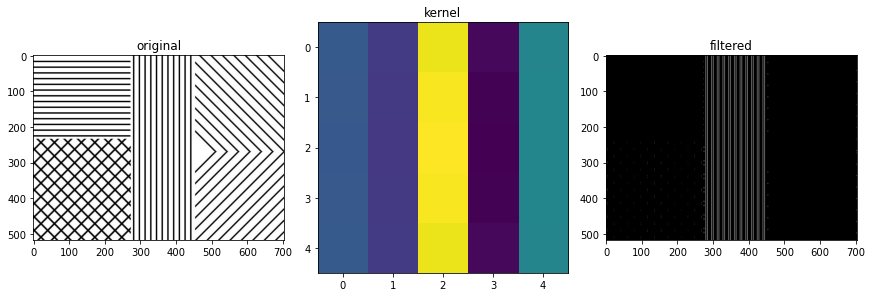

In [173]:
kernel = gabor_kernel(ksize=5, theta=2*np.pi, sigma=3, lamb=1*np.pi/2, gamma=0.5, psi=0)


fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)

fig, ax = plt.subplots(1, 3, figsize=(12,10), constrained_layout=True)

ax[0].imshow(img)
ax[0].set_title("original")

ax[1].imshow(kernel)
ax[1].set_title("kernel")

ax[2].imshow(fimg)
ax[2].set_title("filtered")